In [10]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [2]:
def get_basic_features(path):
    features, feature_names = [], []
    for stat in ["BVP", "HR", "EDA", "TEMP"]:
        signal = pd.read_csv(f"{path}/{stat}.csv")[stat]
        features += [signal.min(), signal.max(), signal.mean(), signal.std()]
        feature_names += [f"{stat}_{f}" for f in ["min", "max", "mean", "std"]]
    return feature_names, features

metadata = pd.read_csv("metadata.csv")
basic_ds = []
for path in metadata['Path']:
    feature_names, features = get_basic_features(path)
    basic_ds.append(features)
    
basic_ds = pd.DataFrame(basic_ds, columns = feature_names)

In [82]:
def get_standardized_signals(stat, n=None, last = True):
    if not n:
        n = metadata[['EDA_n', 'BVP_n', 'HR_n', 'TEMP_n']].min()[stat+'_n']

    raw_ds = []
    for path in metadata['Path']:
        signal = pd.read_csv(f"{path}/{stat}.csv")[stat]
        if last:
            signal = signal.values[-n:]
        else:
            signal = signal.values[:n]
        raw_ds.append(signal)
    
    raw_ds = pd.DataFrame(raw_ds, index=metadata['Path'])
    return raw_ds

raw_ds = get_standardized_signals("EDA")

In [11]:
raw_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
Path,,,,,,,,,,,,,,,,,,,,,
dataset_orig/D1_1/ID_3/round_1/phase1,59.80,59.75,59.68,59.62,59.53,59.43,59.33,59.23,59.12,59.00,...,64.23,64.17,64.05,63.92,63.72,63.92,64.12,64.22,64.32,64.53
dataset_orig/D1_1/ID_3/round_1/phase2,69.48,69.18,68.93,68.73,68.55,68.37,68.10,67.92,67.73,67.53,...,102.33,101.95,101.60,101.28,101.00,100.73,100.45,100.12,99.82,99.48
dataset_orig/D1_1/ID_3/round_1/phase3,106.57,106.93,107.25,107.53,107.90,108.20,108.42,108.65,109.23,109.47,...,62.58,62.50,62.35,62.43,62.55,62.80,63.10,63.43,63.77,64.17
dataset_orig/D1_1/ID_3/round_2/phase1,72.32,72.08,71.92,71.67,71.37,71.15,70.88,70.53,70.23,70.33,...,58.73,58.48,58.27,58.07,57.87,57.78,57.70,57.62,57.70,57.83
dataset_orig/D1_1/ID_3/round_2/phase2,83.00,83.05,83.07,83.10,83.13,83.23,83.35,83.50,83.68,83.90,...,74.05,73.93,73.88,73.73,73.98,74.18,74.33,74.47,74.53,74.58


In [25]:
int(raw_ds.index[0][-1])

1

In [28]:
phase = []
for string in raw_ds.index:
    phase.append(int(string[-1]))

In [30]:
raw_ds["phase"] = phase

In [31]:
raw_ds.shape

(312, 225)

In [34]:
X_1 = raw_ds["phase" == 1].values

In [45]:
X_1 = raw_ds[raw_ds["phase"] == 1].drop('phase', axis=1).values

In [40]:
raw_ds["phase"] == 1

Path
dataset_orig/D1_1/ID_3/round_1/phase1            True
dataset_orig/D1_1/ID_3/round_1/phase2           False
dataset_orig/D1_1/ID_3/round_1/phase3           False
dataset_orig/D1_1/ID_3/round_2/phase1            True
dataset_orig/D1_1/ID_3/round_2/phase2           False
                                                ...  
dataset_orig/D1_3/D1_3_4/ID_1/round_3/phase2    False
dataset_orig/D1_3/D1_3_4/ID_1/round_3/phase3    False
dataset_orig/D1_3/D1_3_4/ID_1/round_4/phase1     True
dataset_orig/D1_3/D1_3_4/ID_1/round_4/phase2    False
dataset_orig/D1_3/D1_3_4/ID_1/round_4/phase3    False
Name: phase, Length: 312, dtype: bool

In [7]:

# n_components = raw_ds.shape[0]
n_components = 3

model = FastICA(n_components=n_components, algorithm='parallel', max_iter=1000)


In [11]:
X.shape

(312, 224)

In [19]:
u, s, h = LA.svd(X)
varianced_explained = s**2 / np.sum(s**2)

In [21]:
varianced_explained

array([9.92768665e-01, 3.76413013e-03, 2.03606432e-03, 7.84894453e-04,
       3.79808322e-04, 1.25801412e-04, 6.86738437e-05, 1.86748280e-05,
       1.19564351e-05, 9.25764030e-06, 7.50443549e-06, 5.78098560e-06,
       4.65775419e-06, 3.59859255e-06, 2.27900527e-06, 1.31273910e-06,
       1.19586850e-06, 1.03475848e-06, 9.06811240e-07, 4.99243971e-07,
       4.31011935e-07, 3.66506677e-07, 3.21229638e-07, 3.00291991e-07,
       2.47917378e-07, 2.24364649e-07, 2.09812638e-07, 1.30171971e-07,
       1.20557386e-07, 1.00045752e-07, 8.48655262e-08, 7.58919403e-08,
       6.96727048e-08, 5.94131991e-08, 4.98659725e-08, 4.50607468e-08,
       3.79308509e-08, 3.35638622e-08, 3.00703301e-08, 2.64969194e-08,
       2.48569623e-08, 2.23702619e-08, 2.04872499e-08, 1.91707946e-08,
       1.71766627e-08, 1.62003196e-08, 1.45291880e-08, 1.32319584e-08,
       1.16869871e-08, 1.04980303e-08, 9.56994501e-09, 9.28502826e-09,
       8.20799159e-09, 7.83949273e-09, 7.25817888e-09, 6.51514322e-09,
      

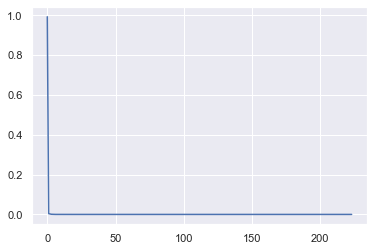

In [20]:
plt.plot(varianced_explained)

In [58]:
X_normalized = (X - X.mean(axis = 0))/X.std(axis = 0)

In [61]:
model_normalized = FastICA(n_components=n_components,
                           algorithm='parallel',
                           max_iter=1000)
W_normalized = model_normalized.fit_transform(X_normalized)

c:\Anaconda3\envs\cda\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [64]:
print(W_normalized.shape, X_normalized.shape)
H_normalized = model_normalized.components_
print(H_normalized.shape)

(312, 5) (312, 224)
(5, 224)


In [65]:
reconstructed_normalized = W_normalized @ H_normalized

In [71]:
reconstructed_normalized

array([[ 3.38723915e-05,  2.77557643e-05,  2.16407788e-05, ...,
         1.94801279e-04,  1.99609792e-04,  2.04708053e-04],
       [-3.18457094e-04, -3.14304579e-04, -3.09788239e-04, ...,
         4.00456225e-04,  4.00327562e-04,  3.99741212e-04],
       [ 1.27034226e-03,  1.24555050e-03,  1.21985688e-03, ...,
         1.56693963e-04,  1.63929430e-04,  1.72081332e-04],
       ...,
       [-3.31258312e-04, -3.22091984e-04, -3.12649391e-04, ...,
        -3.62892299e-05, -3.73508009e-05, -3.87526919e-05],
       [-5.11422345e-05, -5.00661586e-05, -4.88819475e-05, ...,
         1.48944920e-04,  1.51474475e-04,  1.53948688e-04],
       [ 8.11776870e-05,  7.80444536e-05,  7.48550450e-05, ...,
         4.40149192e-05,  4.59215503e-05,  4.79780922e-05]])

In [72]:
X_normalized

array([[-1.3232476 , -1.32092034, -1.31915628, ..., -0.98931457,
        -0.98425802, -0.97092671],
       [-0.64793148, -0.66414457, -0.67649314, ...,  1.69681438,
         1.67814012,  1.65631083],
       [ 1.93961755,  1.96504796,  1.98586918, ..., -1.04842437,
        -1.02550644, -0.99798838],
       ...,
       [-0.84327085, -0.83826328, -0.82934275, ..., -0.30094726,
        -0.29803427, -0.29889513],
       [-0.1707453 , -0.18009455, -0.18667961, ..., -0.22612473,
        -0.20353789, -0.18162788],
       [-0.47003313, -0.47261399, -0.47153571, ..., -0.74913423,
        -0.74726708, -0.74541276]])

In [67]:
np.mean((reconstructed_normalized - X_normalized)**2)

0.999856944267294

In [46]:
W = model.fit_transform(X_1)
H = model.components_
A = model.mixing_

c:\Anaconda3\envs\cda\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [43]:
print(A.shape, H.shape)
reconstructed_2 = A @ H

(224, 5) (5, 224)


In [84]:
H.shape

(5, 224)

In [95]:
n_components = 2

model_1 = FastICA(n_components=n_components, algorithm='parallel', max_iter=1000)
model_2 = FastICA(n_components=n_components, algorithm='parallel', max_iter=1000)
model_3 = FastICA(n_components=n_components, algorithm='parallel', max_iter=1000)


In [96]:
raw_ds["phase"] = phase
X_1 = raw_ds[raw_ds["phase"] == 1].drop('phase', axis=1).values
X_2 = raw_ds[raw_ds["phase"] == 2].drop('phase', axis=1).values
X_3 = raw_ds[raw_ds["phase"] == 3].drop('phase', axis=1).values

In [97]:
W_1 = model_1.fit_transform(X_1)
H_1 = model_1.components_

W_2 = model_2.fit_transform(X_2)
H_2 = model_2.components_

W_3 = model_3.fit_transform(X_3)
H_3 = model_3.components_

c:\Anaconda3\envs\cda\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Anaconda3\envs\cda\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Anaconda3\envs\cda\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
# H_1 = model_1.fit_transform(X_1).components_
# H_2 = model_2.fit_transform(X_2).components_
# H_3 = model_3.fit_transform(X_3).components_

<Figure size 432x288 with 0 Axes>

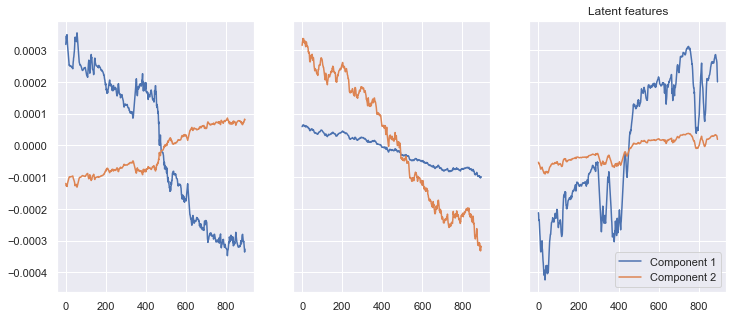

In [98]:
# plt.matshow(H,aspect='auto')
# plt.grid(False)
# plt.show()

plt.figure()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (12, 5))

plt.title("Latent features")
for i in range(H_1.shape[0]):
    ax1.plot(H_1[i, :], label=f"Component {i+1}")
    ax2.plot(H_2[i, :], label=f"Component {i+1}")
    ax3.plot(H_3[i, :], label=f"Component {i+1}")
plt.legend(loc='lower right')
plt.show()

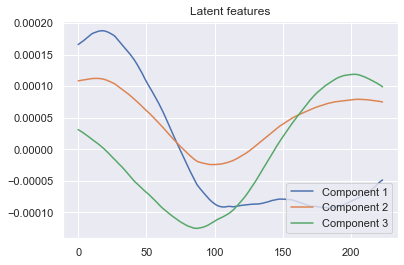

In [54]:
plt.figure()
plt.title("Latent features")
for i in range(H.shape[0]):
    plt.plot(H_2[i, :], label=f"Component {i+1}")
plt.legend(loc='lower right')
plt.show()

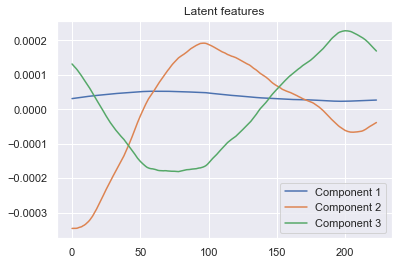

In [55]:
plt.figure()
plt.title("Latent features")
for i in range(H.shape[0]):
    plt.plot(H_3[i, :], label=f"Component {i+1}")
plt.legend(loc='lower right')
plt.show()

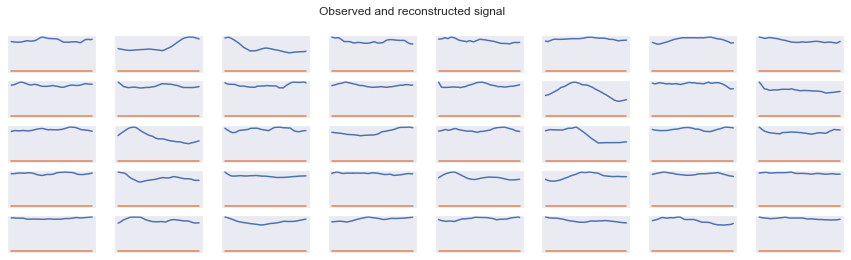

In [70]:
nrows = 5
ncols = 8
fig, axs = plt.subplots(ncols = ncols, nrows=nrows)
fig.set_figwidth(15)
for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols+j
        observed = pd.read_csv(f"{metadata['Path'][idx]}/HR.csv")["HR"].values[-224:]
        #reconstructed = (W@H)[idx, :]
        reconstructed = (W[idx, :]@H)
        axs[i, j].plot(observed)
        axs[i, j].plot(reconstructed)
        axs[i, j].set_yticks([])
        axs[i, j].set_xticks([])
        
fig.suptitle("Observed and reconstructed signal")
plt.show()

In [22]:
print(W.shape, H.shape)
X_hat = (W @ H)
print(X_hat.shape)

(312, 3) (3, 224)
(312, 224)


In [32]:
X_hat[1:2, 1:20]

array([[ 6.11874032e-08, -4.89792003e-08, -1.70542448e-07,
        -3.03821529e-07, -4.39963062e-07, -5.81918901e-07,
        -7.33832908e-07, -8.87221317e-07, -1.04299430e-06,
        -1.18145168e-06, -1.31525944e-06, -1.44202657e-06,
        -1.56519879e-06, -1.69556758e-06, -1.84576186e-06,
        -2.00224857e-06, -2.15417550e-06, -2.29893000e-06,
        -2.43649397e-06]])

In [24]:
np.sum((X - X_hat)**2)

433308834.6426019

In [ ]:
X_hat = X.T @ C @ S
L = 0.5*np.linalg.norm(X.T-X_hat)**2
components = XC.T

SST = np.sum(np.sum(Xtrain**2))
print(f"Variance explained: {1-2*L/SST}")

## Playing around

In [77]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = 2 + np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = 4 + np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = 5 + signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

# S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [ ]:
S

In [78]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X) 

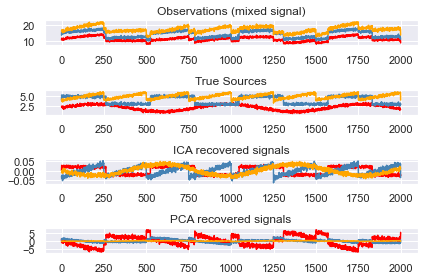

In [79]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()